In [2]:
import ROOT as rt
import uproot
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

#import gpustat
#gpustat.print_gpustat()
#os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02


In [3]:
# Random Data Selection
def ran_data(num, total):
    sample_num = []
    for i in range(num):
        samp = np.random.randint(0, high=total+1)
        while samp in sample_num:
            samp = np.random.randint(0, high=total+1)
        sample_num.append(samp)
    return sample_num

def samp_to_df(samp_name, total_num):
    dfs = []
    for i in range(total_num+1):
        file_name = f'../HHbbggAna/condor/output/{samp_name}{i}.root'
        samp_file = uproot.open(file_name)
        samp_array = samp_file['tree'].arrays()
        samp_df = pd.DataFrame(samp_array)
        dfs.append(samp_df)
    combine_df = pd.concat(dfs, ignore_index=True)
    return combine_df

# Data loading
def data_to_df(job_run, samp_num):
    file_name = f'../HHbbggAna/condor/output/{job_run}/dataJob1ifile{samp_num}.root'
    data_file = uproot.open(file_name)
    data_array = data_file['tree'].arrays()
    data_df = pd.DataFrame(data_array)
    return data_df

In [4]:
# Load full data??
data_2018_full_dfs = []
for i in range(946):
    data_2018_full_dfs.append(data_to_df('job_1_ntuple20180805v1', i))
data_2018_full_df = pd.concat(data_2018_full_dfs, ignore_index=True)

data_2017_full_dfs = []
for i in range(261):
    data_2017_full_dfs.append(data_to_df('job_1_ntuple20170805v1', i))
data_2017_full_df = pd.concat(data_2017_full_dfs, ignore_index=True)

data_2016_full_dfs = []
for i in range(384):
    data_2016_full_dfs.append(data_to_df('job_1_ntuple20160805v1', i))
data_2016_full_df = pd.concat(data_2016_full_dfs, ignore_index=True)

In [5]:
# Set up dataframes - 2018

TTGJets_df_2018 = samp_to_df('job_2_ntuple20180805v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job2ifile', 19)
TTGG_0Jets_df_2018 = samp_to_df('job_3_ntuple20180805v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job3ifile', 28)
TTJets_df_2018 = samp_to_df('job_4_ntuple20180805v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job4ifile', 304)
GluGluToHH_df_2018 = samp_to_df('job_5_ntuple20180805v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job5ifile', 0)
VHToGG_df_2018 = samp_to_df('job_6_ntuple20180805v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job6ifile', 1)
ttHToGG_df_2018 = samp_to_df('job_7_ntuple20180805v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8Job7ifile', 2)
VBFHToGG_df_2018 = samp_to_df('job_8_ntuple20180805v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8Job8ifile', 4)
GluGluHToGG_df_2018 = samp_to_df('job_9_ntuple20180805v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8Job9ifile', 3)
GJet_SmallPt_df_2018 = samp_to_df('job_10_ntuple20180805v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job10ifile', 15)
GJet_BigPt_df_2018 = samp_to_df('job_11_ntuple20180805v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job11ifile', 10)
DiPhotonJetsBox2B_df_2018 = samp_to_df('job_12_ntuple20180805v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob12ifile', 2)
DiPhotonJetsBox1B_df_2018 = samp_to_df('job_13_ntuple20180805v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob13ifile', 3)
DiPhotonJetsBox_df_2018 = samp_to_df('job_14_ntuple20180805v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob14ifile', 23)

In [6]:
# Set up dataframes - 2017
DiPhotonJetsBox1B_df_2017 = samp_to_df('job_2_ntuple20170805v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-SherpaJob2ifile', 15)
DiPhotonJetsBox2B_df_2017 = samp_to_df('job_3_ntuple20170805v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-SherpaJob3ifile', 25)
DiPhotonJetsBox_df_2017 = samp_to_df('job_4_ntuple20170805v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob4ifile', 83)
GJet_SmallPt_df_2017 = samp_to_df('job_5_ntuple20170805v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job5ifile', 11)
GJet_BigPt_df_2017 = samp_to_df('job_6_ntuple20170805v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8Job6ifile', 104)
GluGluHToGG_df_2017 = samp_to_df('job_7_ntuple20170805v1/GluGluHToGG_M-125_13TeV_powheg_pythia8Job7ifile', 1)
GluGluToHH_df_2017 = samp_to_df('job_8_ntuple20170805v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8Job8ifile', 15)
TTGG_0Jets_df_2017 = samp_to_df('job_9_ntuple20170805v1/TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8Job9ifile', 8)
TTGJets_df_2017 = samp_to_df('job_10_ntuple20170805v1/TTGJets_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8Job10ifile', 53)
TTJets_df_2017 = samp_to_df('job_11_ntuple20170805v1/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8Job11ifile', 194)
VBFHToGG_df_2017 = samp_to_df('job_12_ntuple20170805v1/VBFHToGG_M-125_13TeV_powheg_pythia8Job12ifile', 11)
VHToGG_df_2017 = samp_to_df('job_13_ntuple20170805v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job13ifile', 0)
ttHToGG_df_2017 = samp_to_df('job_14_ntuple20170805v1/ttHToGG_M125_13TeV_powheg_pythia8Job14ifile', 3)

In [7]:
# Set up dataframes - 2016
DiPhotonJetsBox1B_df_2016 = samp_to_df('job_2_ntuple20160805v1/DiPhotonJetsBox1BJet_MGG-80toInf_TuneSherpa_13TeV-SherpaJob2ifile', 17)
DiPhotonJetsBox2B_df_2016 = samp_to_df('job_3_ntuple20160805v1/DiPhotonJetsBox2BJets_MGG-80toInf_TuneSherpa_13TeV-SherpaJob3ifile', 23)
DiPhotonJetsBox_df_2016 = samp_to_df('job_4_ntuple20160805v1/DiPhotonJetsBox_MGG-80toInf_13TeV-SherpaJob4ifile', 48)
GJet_SmallPt_df_2016 = samp_to_df('job_5_ntuple20160805v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job5ifile', 13)
GJet_BigPt_df_2016 = samp_to_df('job_6_ntuple20160805v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8Job6ifile', 64)
GluGluHToGG_df_2016 = samp_to_df('job_7_ntuple20160805v1/GluGluHToGG_M125_13TeV_amcatnloFXFX_pythiaJob7ifile', 0)
GluGluToHH_df_2016 = samp_to_df('job_8_ntuple20160805v1/GluGluToHHTo2B2G_node_cHHH1_TuneCUETP8M1_PSWeights_13TeV-powheg-pythia8Job8ifile', 3)
TTGG_0Jets_df_2016 = samp_to_df('job_9_ntuple20160805v1/TTGG_0Jets_TuneCUETP8M1_13TeV_amcatnlo_madspin_pythia8Job9ifile', 2)
TTGJets_df_2016 = samp_to_df('job_10_ntuple20160805v1/TTGJets_TuneCUETP8M1_13TeV-amcatnloFXFX-madspin-pythia8Job10ifile', 12)
TTJets_df_2016 = samp_to_df('job_11_ntuple20160805v1/TTJets_TuneCUETP8M2T4_13TeV-amcatnloFXFX-pythia8Job11ifile', 43)
VBFHToGG_df_2016 = samp_to_df('job_12_ntuple20160805v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8_v2Job12ifile', 11)
VHToGG_df_2016 = samp_to_df('job_13_ntuple20160805v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8Job13ifile', 1)
ttHToGG_df_2016 = samp_to_df('job_14_ntuple20160805v1/ttHToGG_M125_13TeV_powheg_pythia8_v2Job14ifile', 0)

In [8]:
# Good luminosity functions

def convert_json_txt_to_dict(file_name):
    with open(file_name) as file:
        data = file.read()
    return json.loads(data)

def good_lumi_list(data_df, good_lumi_dict):
    good_lumis = []
    for index, row in data_df.iterrows():
        run = row[b'run']
        lumi = row[b'lumi']
        good_lumi = 0
        if str(int(run)) in good_lumi_dict:
            lumi_blocks = good_lumi_dict[str(int(run))]
            for lumi_block in lumi_blocks:
                if lumi_block[0] <= lumi and lumi <= lumi_block[1]:
                    good_lumi = 1
                    break
        good_lumis.append(good_lumi)
    return good_lumis

In [9]:
# Get good luminosity dictionaries

Good_Lum_2018 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_314472-325175_13TeV_17SeptEarlyReReco2018ABC_PromptEraD_Collisions18_JSON.txt')
Good_Lum_2017 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_294927-306462_13TeV_EOY2017ReReco_Collisions17_JSON_v1.txt')
Good_Lum_2016 = convert_json_txt_to_dict('../HHbbggAna/data/GoodRunJSON/Cert_271036-284044_13TeV_ReReco_07Aug2017_Collisions16_JSON.txt')

In [10]:
# Good luminosity selection

data_2018_full_df[b'good_lumi'] = good_lumi_list(data_2018_full_df, Good_Lum_2018)
data_2018_good_df = data_2018_full_df[data_2018_full_df[b'good_lumi'] == 1]

data_2017_full_df[b'good_lumi'] = good_lumi_list(data_2017_full_df, Good_Lum_2017)
data_2017_good_df = data_2017_full_df[data_2017_full_df[b'good_lumi'] == 1]

data_2016_full_df[b'good_lumi'] = good_lumi_list(data_2016_full_df, Good_Lum_2016)
data_2016_good_df = data_2016_full_df[data_2016_full_df[b'good_lumi'] == 1]

In [11]:
# Combine dfs
data_full_df = pd.concat([data_2018_full_df, data_2017_full_df, data_2016_full_df], ignore_index=True)
data_good_df = pd.concat([data_2018_good_df, data_2017_good_df, data_2016_good_df], ignore_index=True)
TTGJets_df = pd.concat([TTGJets_df_2018, TTGJets_df_2017, TTGJets_df_2016], ignore_index=True)
TTGG_0Jets_df = pd.concat([TTGG_0Jets_df_2018, TTGG_0Jets_df_2017, TTGG_0Jets_df_2016], ignore_index=True)
TTJets_df = pd.concat([TTJets_df_2018, TTJets_df_2017, TTJets_df_2016], ignore_index=True)
GluGluToHH_df = pd.concat([GluGluToHH_df_2018, GluGluToHH_df_2017, GluGluToHH_df_2016], ignore_index=True)
VHToGG_df = pd.concat([VHToGG_df_2018, VHToGG_df_2017, VHToGG_df_2016], ignore_index=True)
ttHToGG_df = pd.concat([ttHToGG_df_2018, ttHToGG_df_2017, ttHToGG_df_2016], ignore_index=True)
VBFHToGG_df = pd.concat([VBFHToGG_df_2018, VBFHToGG_df_2017, VBFHToGG_df_2016], ignore_index=True)
GluGluHToGG_df = pd.concat([GluGluHToGG_df_2018, GluGluHToGG_df_2017, GluGluHToGG_df_2016], ignore_index=True)
GJet_SmallPt_df = pd.concat([GJet_SmallPt_df_2018, GJet_SmallPt_df_2017, GJet_SmallPt_df_2016], ignore_index=True)
GJet_BigPt_df = pd.concat([GJet_BigPt_df_2018, GJet_BigPt_df_2017, GJet_BigPt_df_2016], ignore_index=True)
DiPhotonJetsBox2B_df = pd.concat([DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox2B_df_2017, DiPhotonJetsBox2B_df_2016], ignore_index=True)
DiPhotonJetsBox1B_df = pd.concat([DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox1B_df_2017, DiPhotonJetsBox1B_df_2016], ignore_index=True)
DiPhotonJetsBox_df = pd.concat([DiPhotonJetsBox_df_2018, DiPhotonJetsBox_df_2017, DiPhotonJetsBox_df_2016], ignore_index=True)

In [12]:
# Total data yield

total_2018 = np.sum(data_2018_full_df.loc[:, b'genweight'].values)
print(f'2018 Total: {total_2018}')
total_good_2018 = np.sum(data_2018_good_df.loc[:, b'genweight'].values)
print(f'2018 Total w/ Good Lumin: {total_good_2018}')
print('\n')

total_2017 = np.sum(data_2017_full_df.loc[:, b'genweight'].values)
print(f'2017 Total: {total_2017}')
total_good_2017 = np.sum(data_2017_good_df.loc[:, b'genweight'].values)
print(f'2017 Total w/ Good Lumin: {total_good_2017}')
print('\n')

total_2016 = np.sum(data_2016_full_df.loc[:, b'genweight'].values)
print(f'2016 Total: {total_2016}')
total_good_2016 = np.sum(data_2016_good_df.loc[:, b'genweight'].values)
print(f'2016 Total w/ Good Lumin: {total_good_2016}')
print('\n')

total_full = np.sum(data_full_df.loc[:, b'genweight'].values)
print(f'Combine total: {total_full}')
total_good = np.sum(data_good_df.loc[:, b'genweight'].values)
print(f'Combine total w/ good lumin: {total_good}')

2018 Total: 209798.0
2018 Total w/ Good Lumin: 197767.0


2017 Total: 141104.0
2017 Total w/ Good Lumin: 135060.0


2016 Total: 106734.0
2016 Total w/ Good Lumin: 102996.0


Combine total: 457636.0
Combine total w/ good lumin: 435823.0


In [14]:
dfs_2018 = [TTGJets_df_2018, TTGG_0Jets_df_2018, TTJets_df_2018, 
            GluGluToHH_df_2018, VHToGG_df_2018, ttHToGG_df_2018, GluGluHToGG_df_2018, VBFHToGG_df_2018, 
            GJet_SmallPt_df_2018, GJet_BigPt_df_2018, DiPhotonJetsBox2B_df_2018, DiPhotonJetsBox1B_df_2018, DiPhotonJetsBox_df_2018]
df_names = ['TTGJets', 'TTGG_0Jets', 'TTJets', 
            'GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'VBFHToGG', 
            'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['red', 'blue', 'magenta', 
          'salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 
          'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']
print('2018 Samples')
for i in range(len(dfs_2018)):
    print(df_names[i])
    total = np.sum(dfs_2018[i].loc[:, b'genweight'].values)
    print(f'Total: {total}')
    rec = np.sum(dfs_2018[i].loc[:, b'recon'].values * dfs_2018[i].loc[:, b'genweight'].values)
    print('\n')

2018 Samples
TTGJets
Total: 1904.8463134765625


TTGG_0Jets
Total: 31.212722778320312


TTJets
Total: 33366.23046875


GluGluToHH signal
Total: 1.1894623041152954


VHToGG
Total: 41.94608688354492


ttHToGG
Total: 14.793452262878418


GluGluHToGG
Total: 242.08421325683594


VBFHToGG
Total: 16.524078369140625


GJet_SmallPt
Total: 803.6556396484375


GJet_BigPt
Total: 31432.552734375


DiPhotonJetsBox2B
Total: 406.68359375


DiPhotonJetsBox1B
Total: 1338.3565673828125


DiPhotonJetsBox
Total: 43954.5078125




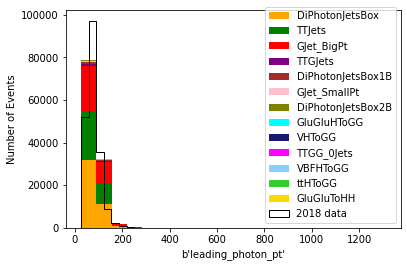

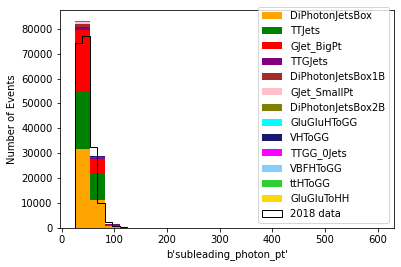

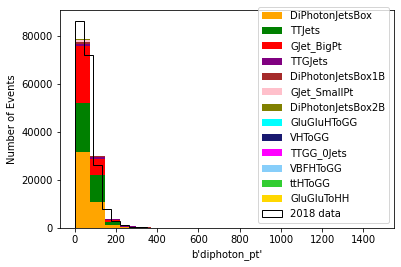

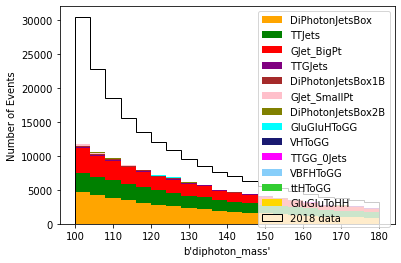

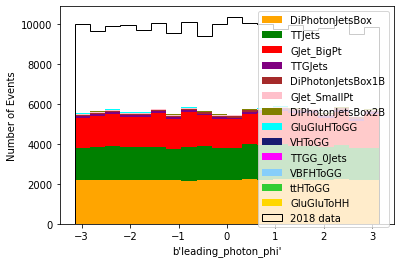

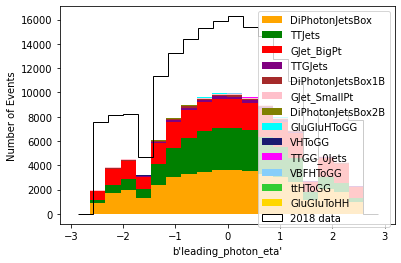

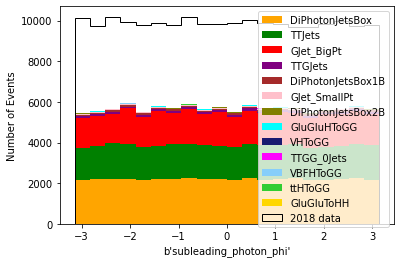

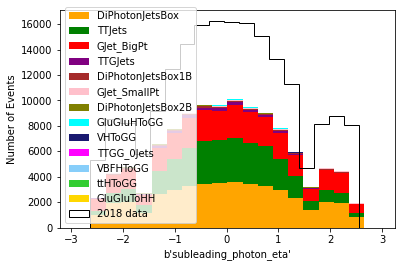

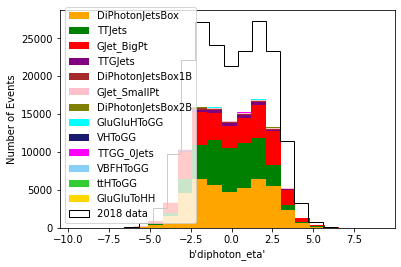

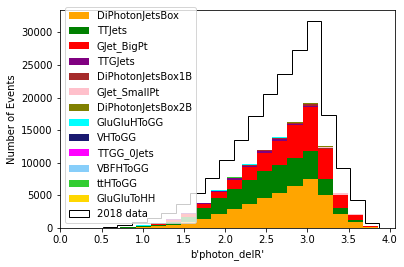

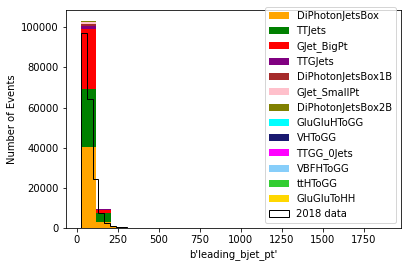

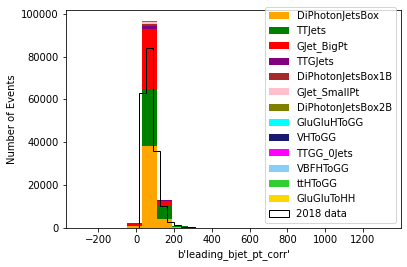

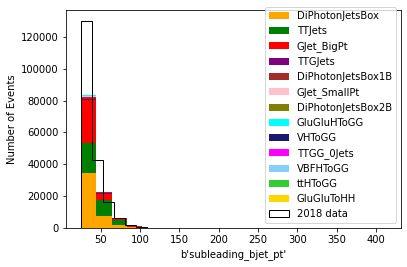

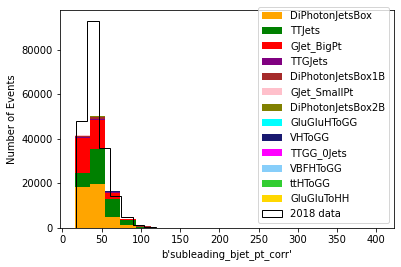

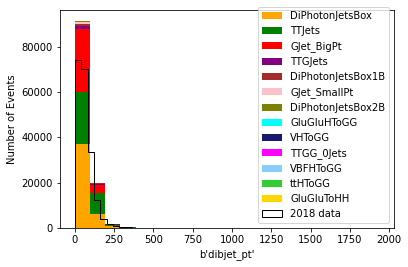

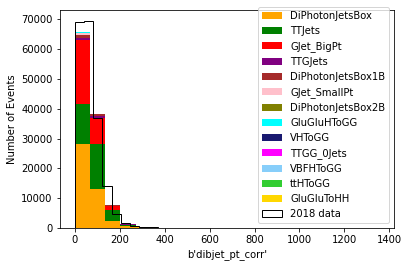

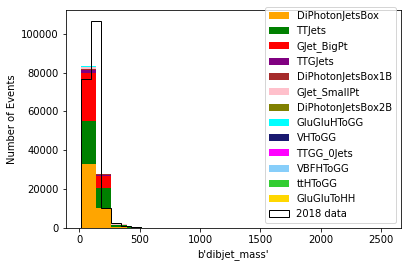

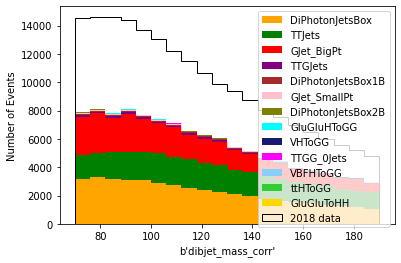

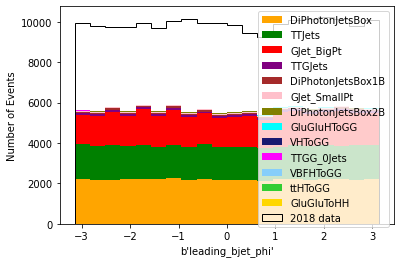

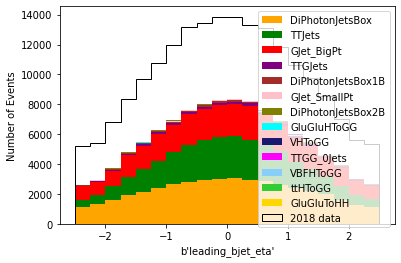

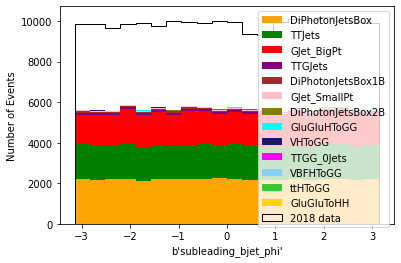

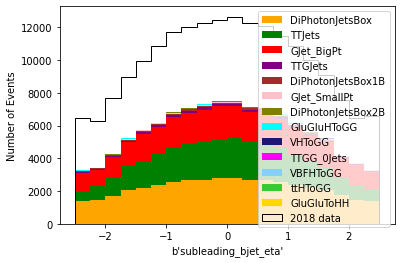

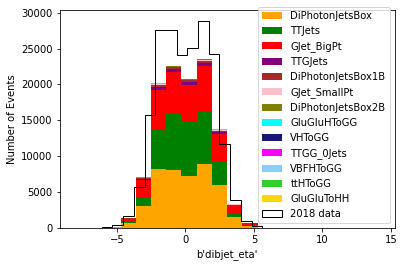

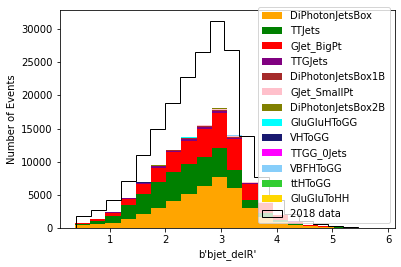

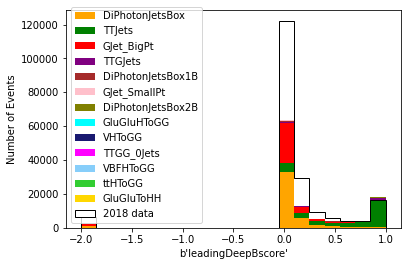

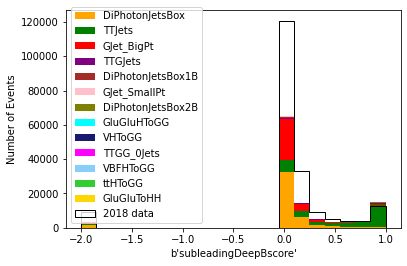

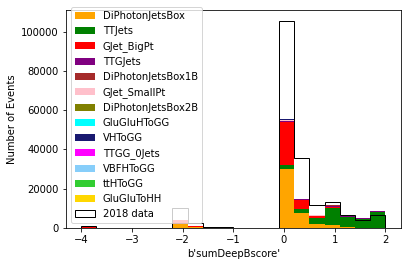

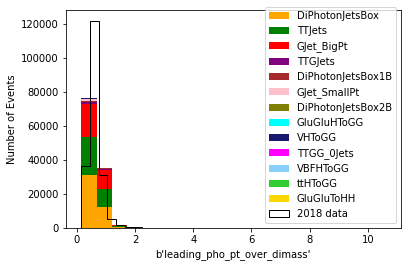

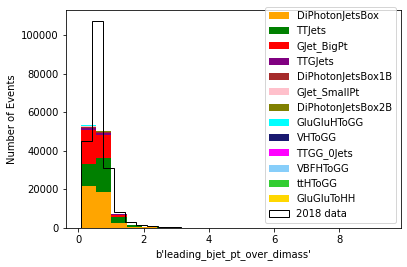

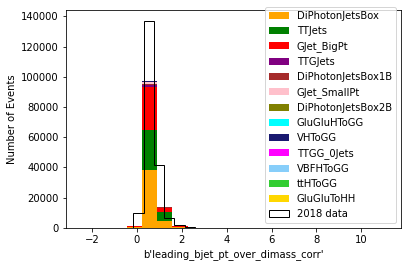

In [12]:
# 2018 plots - full

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

dfs = [DiPhotonJetsBox_df_2018, TTJets_df_2018, GJet_BigPt_df_2018, TTGJets_df_2018, 
      DiPhotonJetsBox1B_df_2018, GJet_SmallPt_df_2018, DiPhotonJetsBox2B_df_2018, GluGluHToGG_df_2018, VHToGG_df_2018,
      TTGG_0Jets_df_2018, VBFHToGG_df_2018, ttHToGG_df_2018,  GluGluToHH_df_2018]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

for pvar in photon_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, pvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_good_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2018/{evar}.png', format='png')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, bvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_good_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2018/{bvar}.png', format='png')
    plt.show()

for evar in extra_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, evar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2018_good_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2018 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2018/{evar}.png', format='png')
    plt.show()

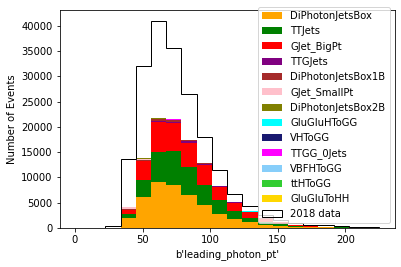

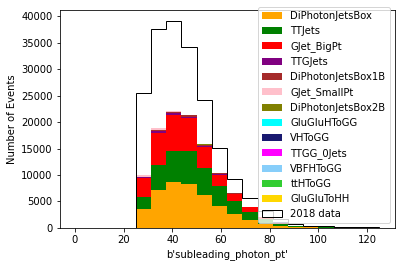

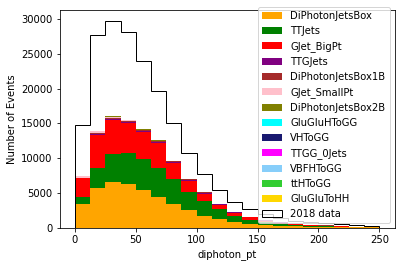

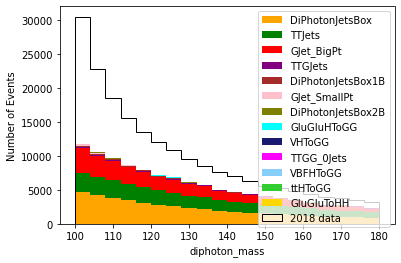

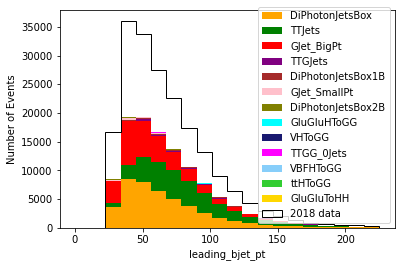

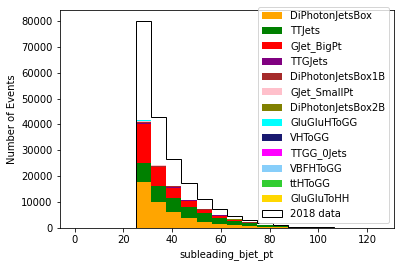

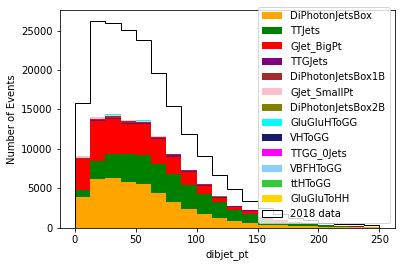

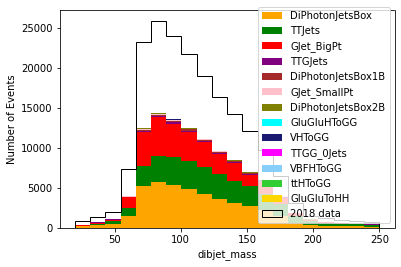

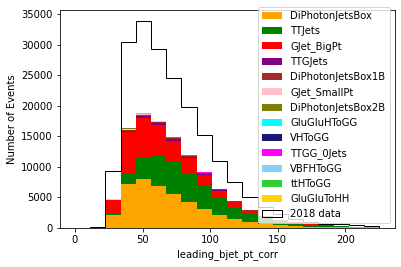

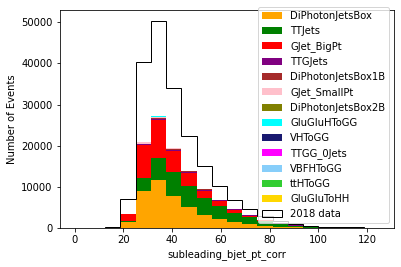

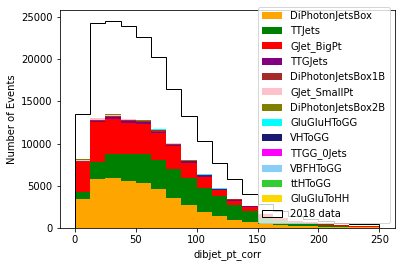

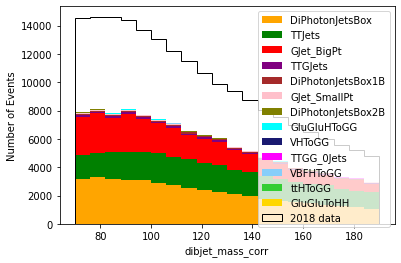

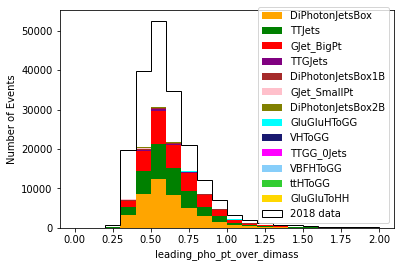

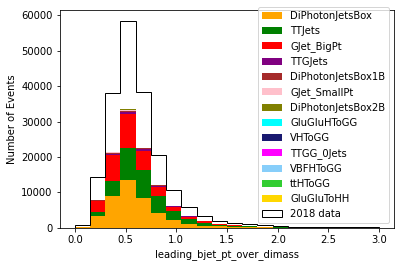

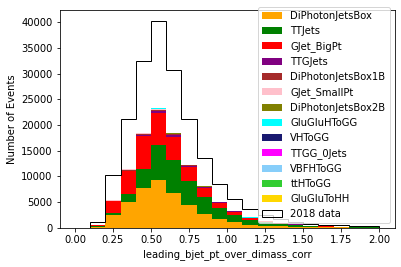

In [19]:
# 2018 plots - close

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [DiPhotonJetsBox_df_2018, TTJets_df_2018, GJet_BigPt_df_2018, TTGJets_df_2018, 
      DiPhotonJetsBox1B_df_2018, GJet_SmallPt_df_2018, DiPhotonJetsBox2B_df_2018, GluGluHToGG_df_2018, VHToGG_df_2018,
      TTGG_0Jets_df_2018, VBFHToGG_df_2018, ttHToGG_df_2018,  GluGluToHH_df_2018]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

# Photon pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'leading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel(b'leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_leading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'subleading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel(b'subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_subleading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'diphoton_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel('diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_diphoton_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'diphoton_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (100, 180))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (100, 180))
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_diphoton_mass.png', format='png')
plt.show()

# Bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'leading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel('leading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_leading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'subleading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel('subleading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_subleading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'dibjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel('dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_dibjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'dibjet_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (20, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (20, 250))
plt.xlabel('dibjet_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_dibjet_mass.png', format='png')
plt.show()

# Corrected bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'leading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 225))
plt.xlabel('leading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_leading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'subleading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 125))
plt.xlabel('subleading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_subleading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'dibjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 250))
plt.xlabel('dibjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_dibjet_pt_corr.png', format='png')
plt.show()


vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'dibjet_mass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (70, 190))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (70, 190))
plt.xlabel('dibjet_mass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_dibjet_mass_corr.png', format='png')
plt.show()

# Leading objet pt over diobjet mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_pho_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'leading_pho_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 2))
plt.xlabel('leading_pho_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_leading_pho_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'leading_bjet_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 3))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 3))
plt.xlabel('leading_bjet_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_leading_bjet_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2018_good_df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2018 data', range = (0, 2))
plt.xlabel('leading_bjet_pt_over_dimass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2018/2018_leading_bjet_pt_over_dimass_corr.png', format='png')
plt.show()

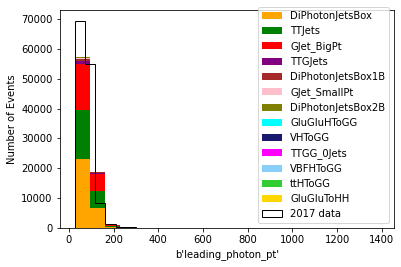

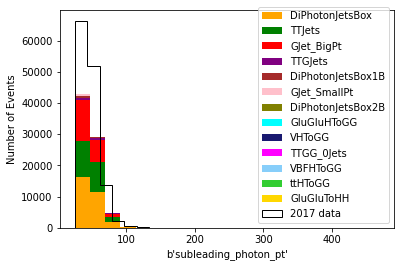

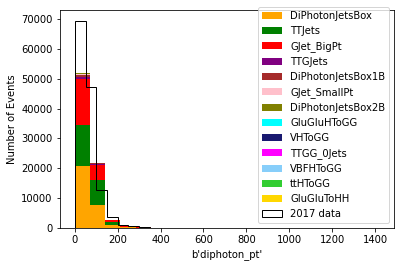

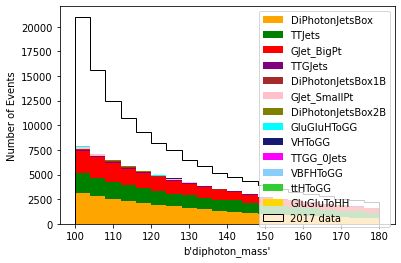

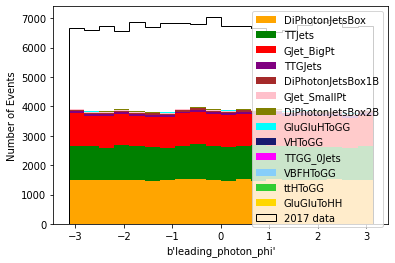

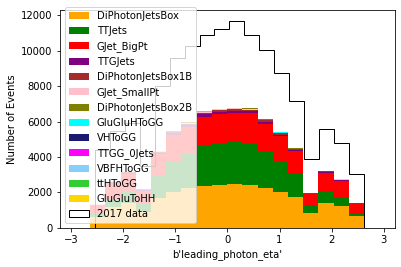

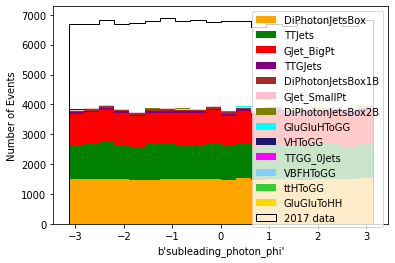

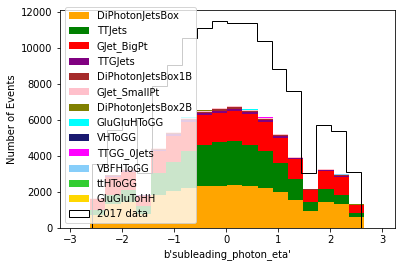

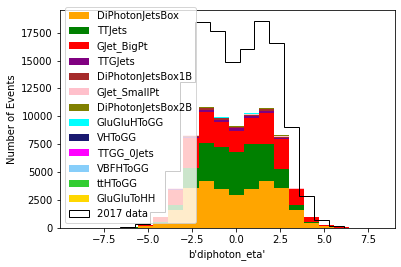

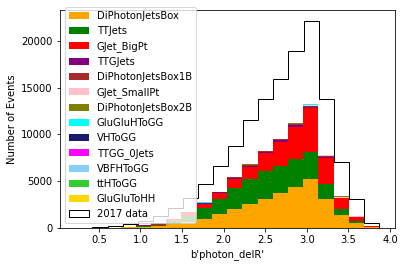

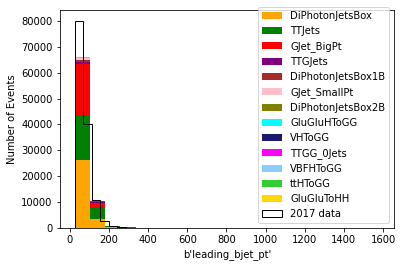

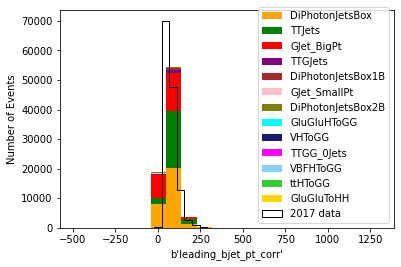

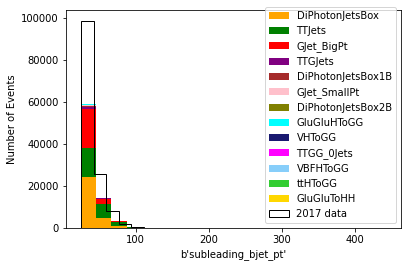

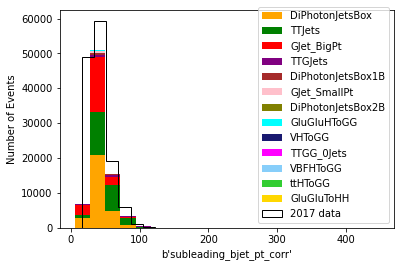

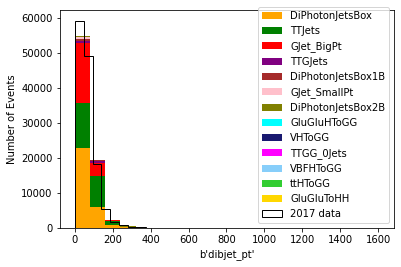

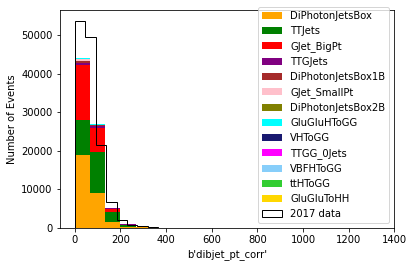

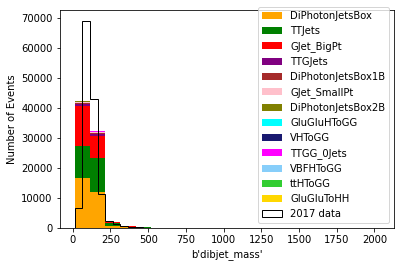

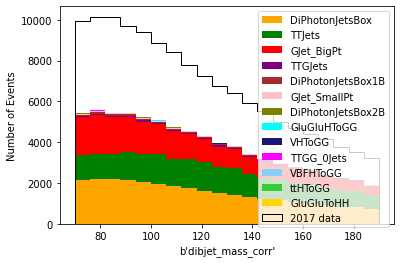

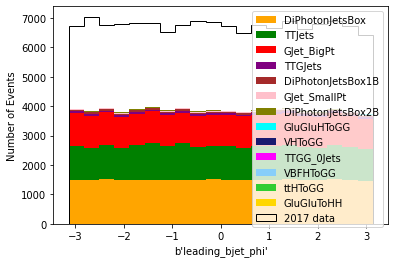

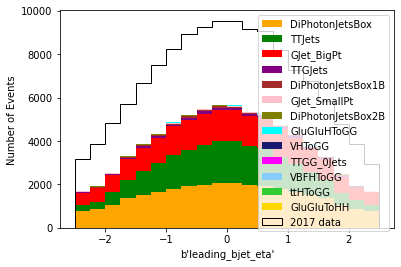

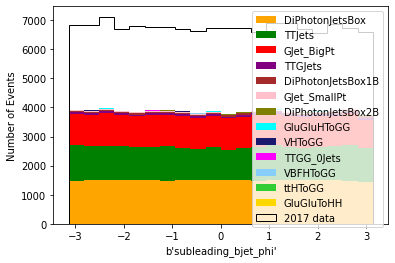

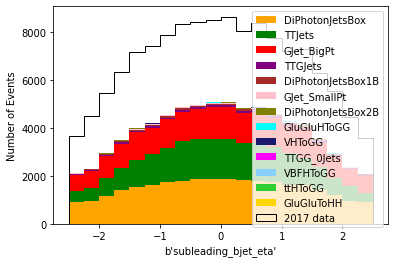

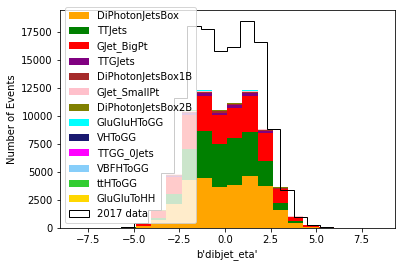

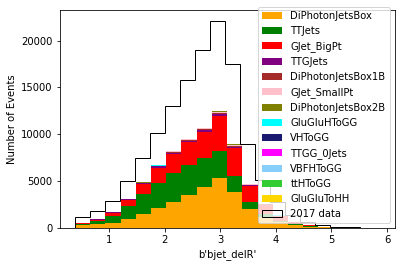

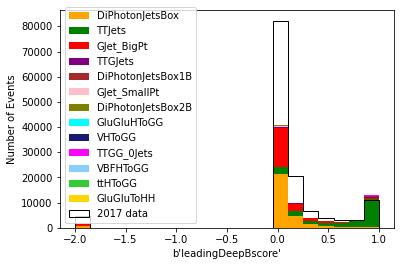

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


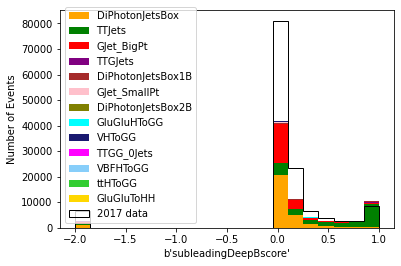

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


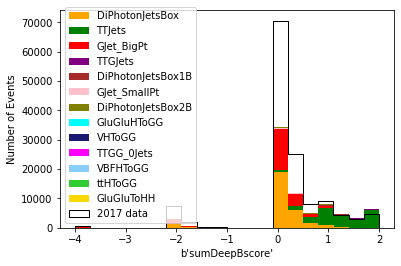

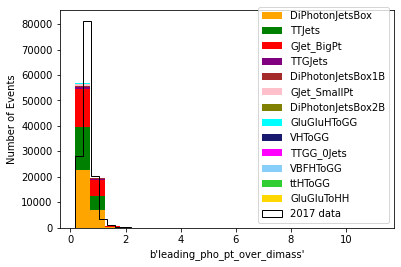

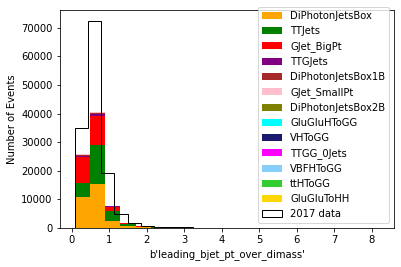

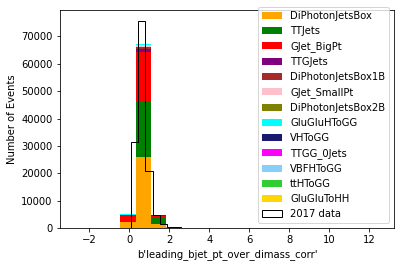

In [20]:
# 2017 plots - full

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

dfs = [DiPhotonJetsBox_df_2017, TTJets_df_2017, GJet_BigPt_df_2017, TTGJets_df_2017, 
      DiPhotonJetsBox1B_df_2017, GJet_SmallPt_df_2017, DiPhotonJetsBox2B_df_2017, GluGluHToGG_df_2017, VHToGG_df_2017,
      TTGG_0Jets_df_2017, VBFHToGG_df_2017, ttHToGG_df_2017,  GluGluToHH_df_2017]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

for pvar in photon_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, pvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2017_good_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2017/{evar}.png', format='png')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, bvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2017_good_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2017 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2017/{bvar}.png', format='png')
    plt.show()

for evar in extra_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, evar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2017_good_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2017 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2017/{evar}.png', format='png')
    plt.show()

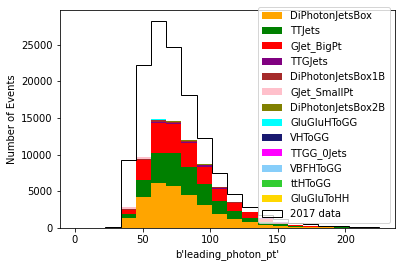

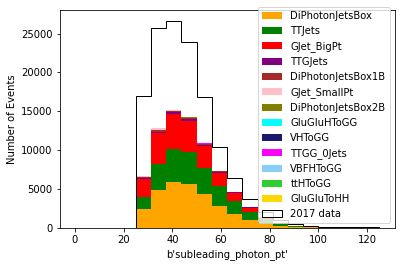

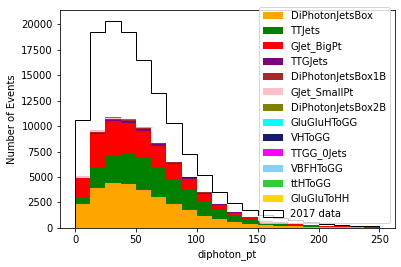

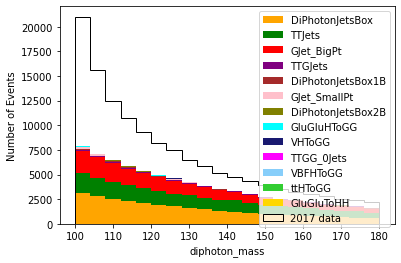

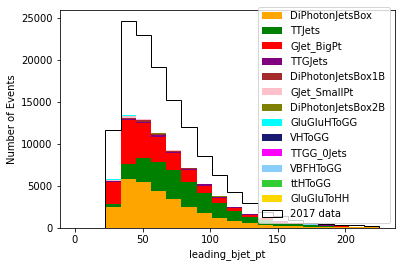

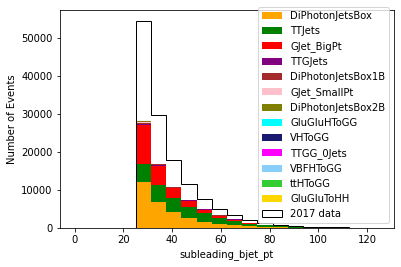

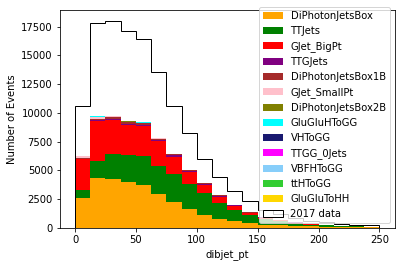

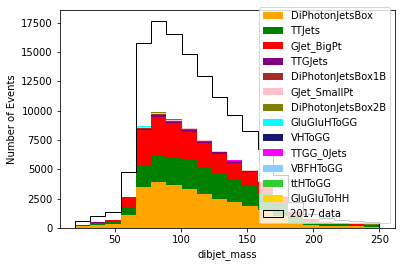

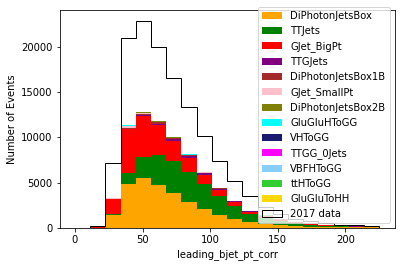

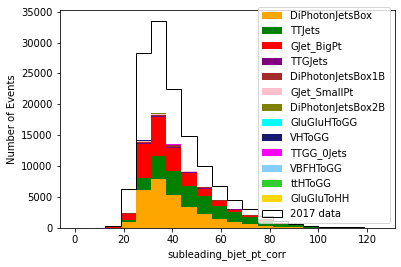

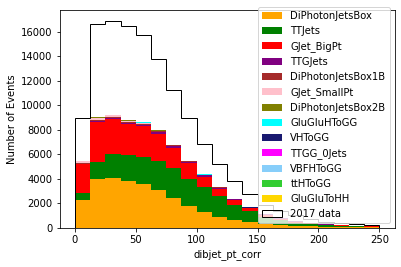

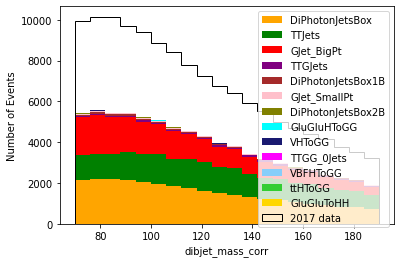

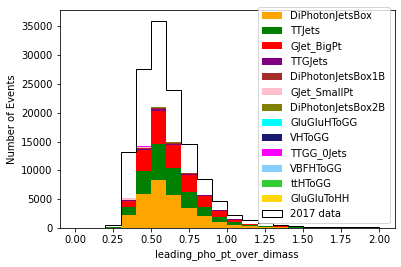

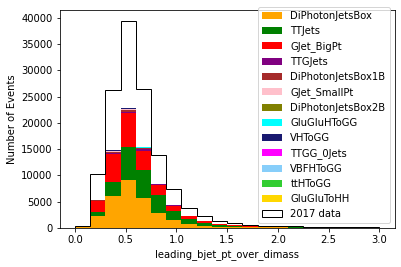

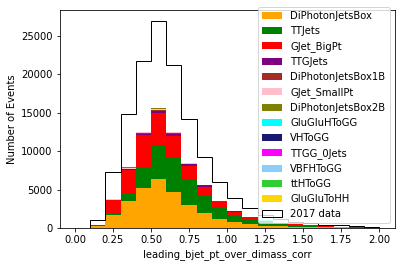

In [21]:
# 2017 plots - close

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [DiPhotonJetsBox_df_2017, TTJets_df_2017, GJet_BigPt_df_2017, TTGJets_df_2017, 
      DiPhotonJetsBox1B_df_2017, GJet_SmallPt_df_2017, DiPhotonJetsBox2B_df_2017, GluGluHToGG_df_2017, VHToGG_df_2017,
      TTGG_0Jets_df_2017, VBFHToGG_df_2017, ttHToGG_df_2017,  GluGluToHH_df_2017]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

# Photon pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'leading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 225))
plt.xlabel(b'leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_leading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'subleading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 125))
plt.xlabel(b'subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_subleading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'diphoton_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 250))
plt.xlabel('diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_diphoton_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'diphoton_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (100, 180))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (100, 180))
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_diphoton_mass.png', format='png')
plt.show()

# Bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'leading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 225))
plt.xlabel('leading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_leading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'subleading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 125))
plt.xlabel('subleading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_subleading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'dibjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 250))
plt.xlabel('dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_dibjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'dibjet_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (20, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (20, 250))
plt.xlabel('dibjet_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_dibjet_mass.png', format='png')
plt.show()

# Corrected bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'leading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 225))
plt.xlabel('leading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_leading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'subleading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 125))
plt.xlabel('subleading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_subleading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'dibjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 250))
plt.xlabel('dibjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_dibjet_pt_corr.png', format='png')
plt.show()


vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'dibjet_mass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (70, 190))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (70, 190))
plt.xlabel('dibjet_mass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_dibjet_mass_corr.png', format='png')
plt.show()

# Leading objet pt over diobjet mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_pho_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'leading_pho_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 2))
plt.xlabel('leading_pho_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_leading_pho_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'leading_bjet_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 3))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 3))
plt.xlabel('leading_bjet_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_leading_bjet_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2017_good_df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2017 data', range = (0, 2))
plt.xlabel('leading_bjet_pt_over_dimass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2017/2017_leading_bjet_pt_over_dimass_corr.png', format='png')
plt.show()

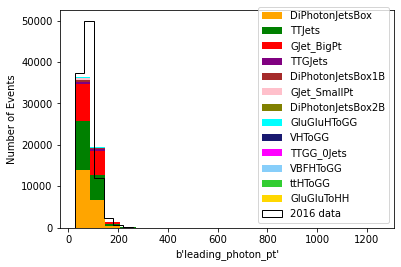

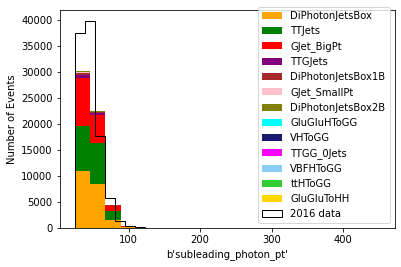

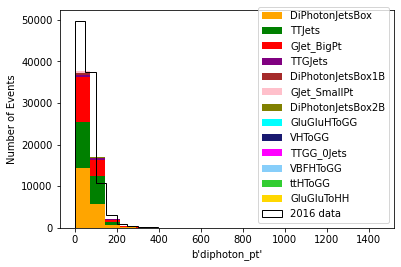

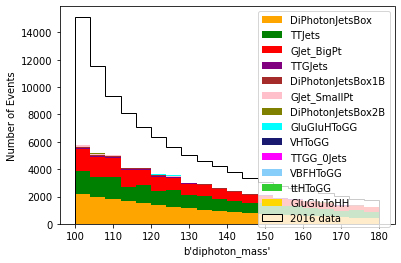

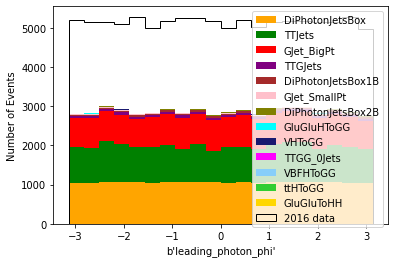

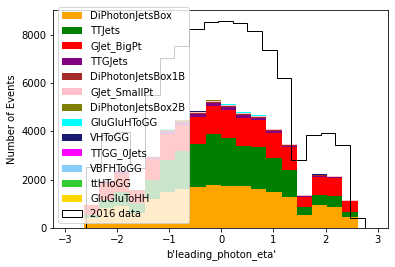

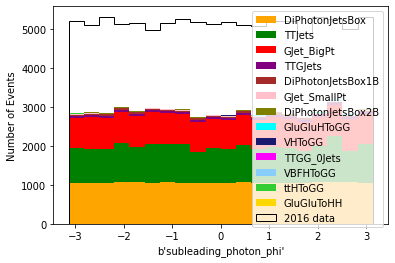

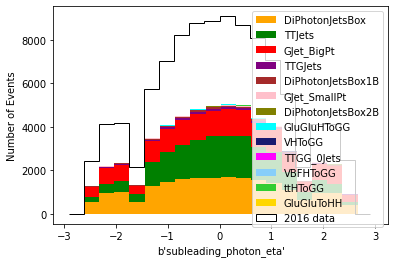

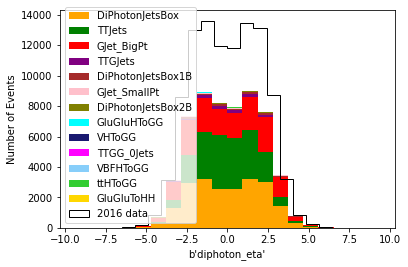

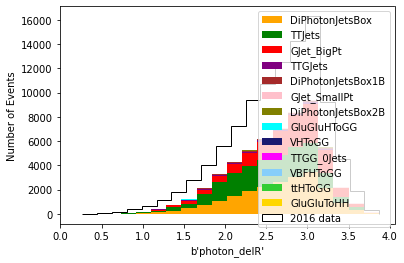

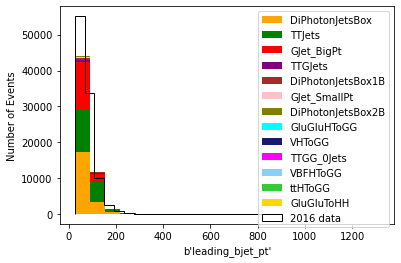

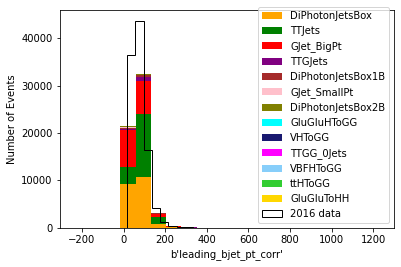

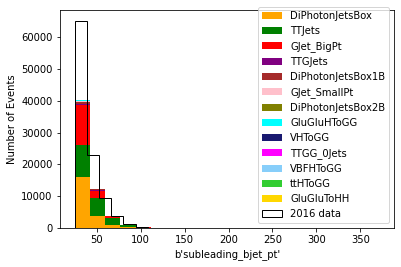

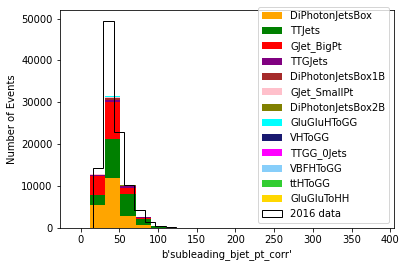

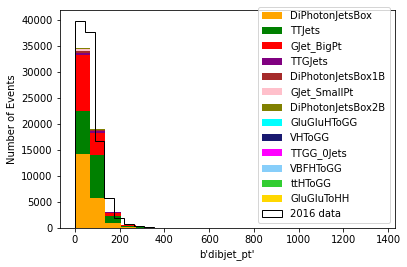

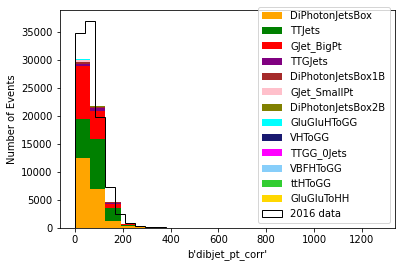

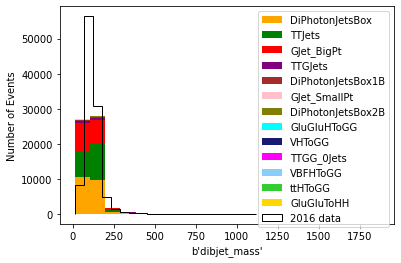

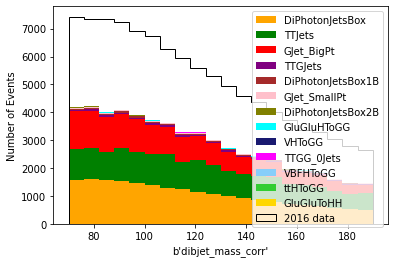

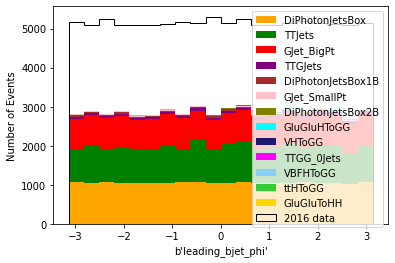

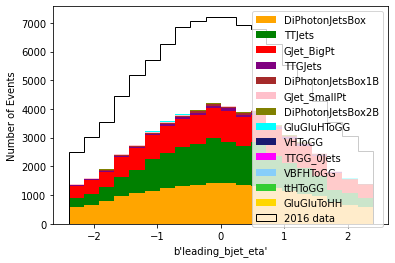

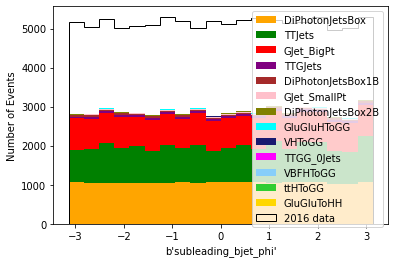

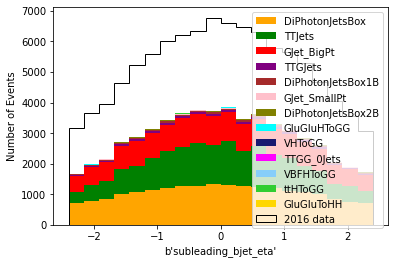

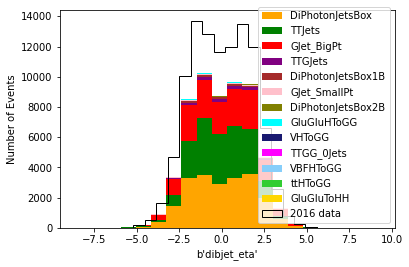

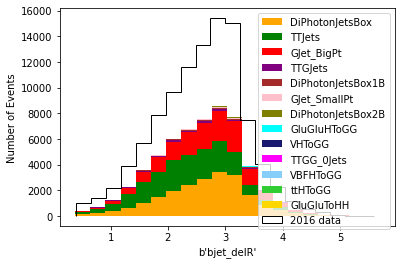

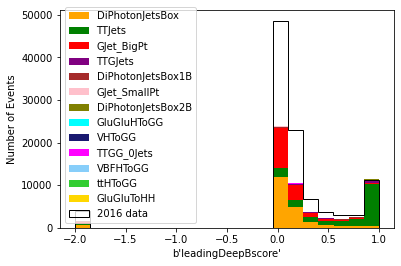

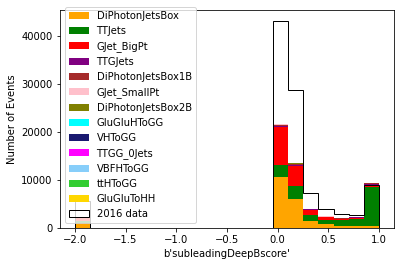

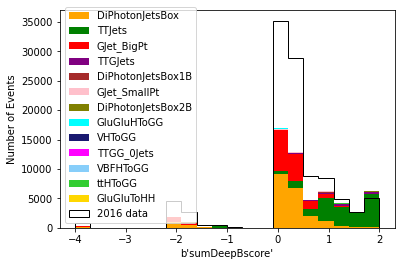

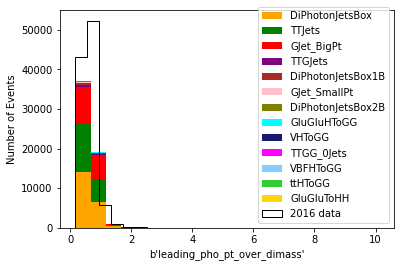

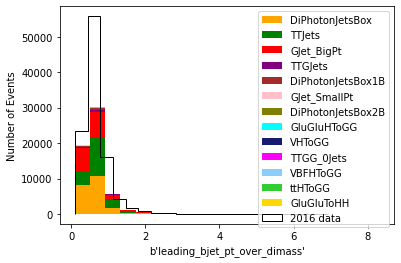

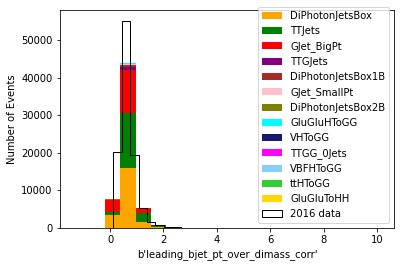

In [22]:
# 2016 plots - full

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

dfs = [DiPhotonJetsBox_df_2016, TTJets_df_2016, GJet_BigPt_df_2016, TTGJets_df_2016, 
      DiPhotonJetsBox1B_df_2016, GJet_SmallPt_df_2016, DiPhotonJetsBox2B_df_2016, GluGluHToGG_df_2016, VHToGG_df_2016,
      TTGG_0Jets_df_2016, VBFHToGG_df_2016, ttHToGG_df_2016,  GluGluToHH_df_2016]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

for pvar in photon_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, pvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2016_good_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2016/{evar}.png', format='png')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, bvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2016_good_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2016 data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2016/{bvar}.png', format='png')
    plt.show()

for evar in extra_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, evar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_2016_good_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'2016 data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    #plt.savefig(fname = f'Plots/Data_MC_Plots/2016/{evar}.png', format='png')
    plt.show()

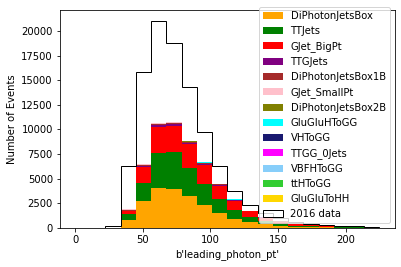

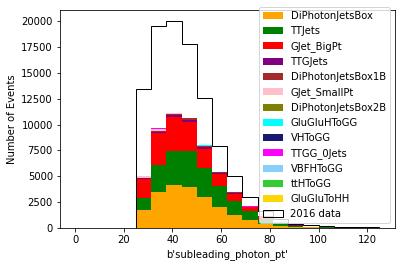

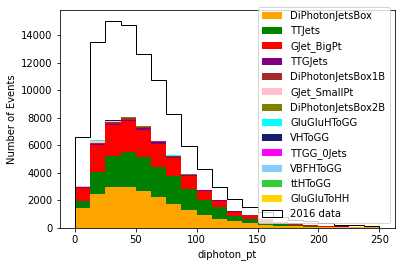

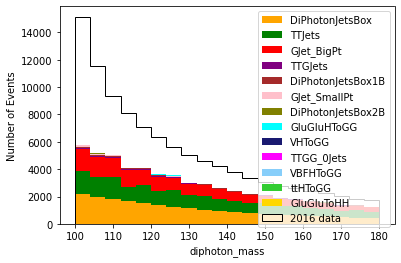

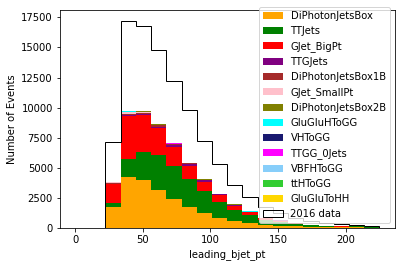

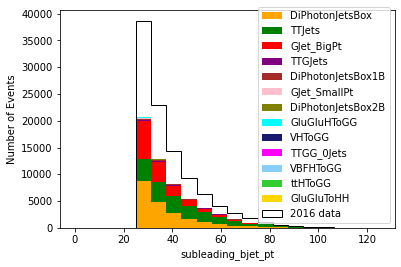

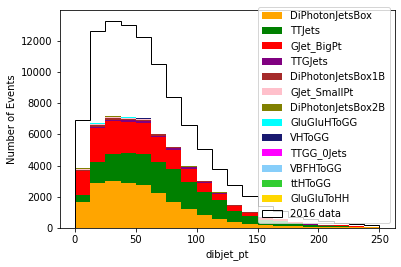

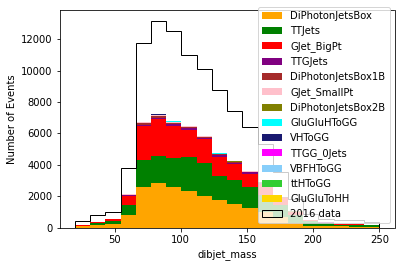

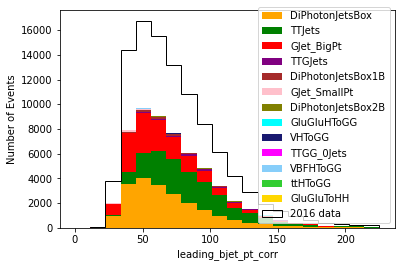

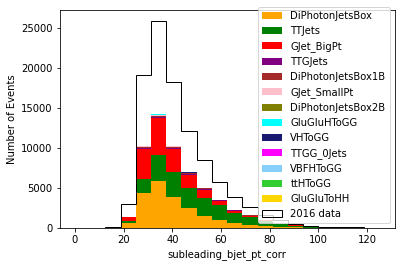

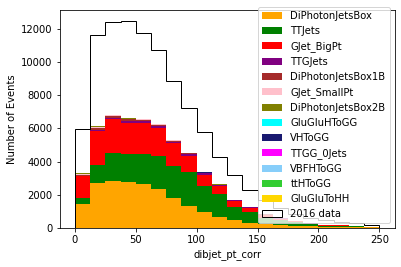

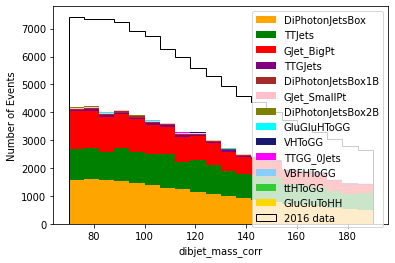

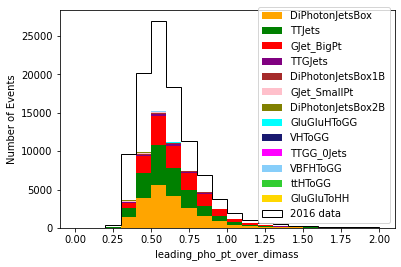

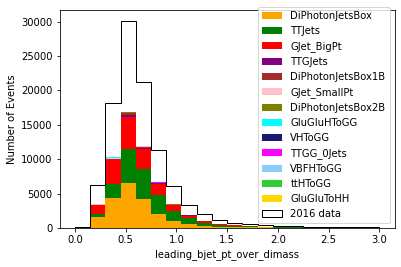

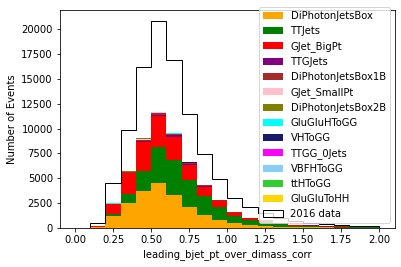

In [23]:
# 2016 plots - close

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [DiPhotonJetsBox_df_2016, TTJets_df_2016, GJet_BigPt_df_2016, TTGJets_df_2016, 
      DiPhotonJetsBox1B_df_2016, GJet_SmallPt_df_2016, DiPhotonJetsBox2B_df_2016, GluGluHToGG_df_2016, VHToGG_df_2016,
      TTGG_0Jets_df_2016, VBFHToGG_df_2016, ttHToGG_df_2016,  GluGluToHH_df_2016]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

# Photon pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'leading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 225))
plt.xlabel(b'leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_leading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'subleading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 125))
plt.xlabel(b'subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_subleading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'diphoton_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 250))
plt.xlabel('diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_diphoton_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'diphoton_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (100, 180))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (100, 180))
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_diphoton_mass.png', format='png')
plt.show()

# Bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'leading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 225))
plt.xlabel('leading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_leading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'subleading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 125))
plt.xlabel('subleading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_subleading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'dibjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 250))
plt.xlabel('dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_dibjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'dibjet_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (20, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (20, 250))
plt.xlabel('dibjet_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_dibjet_mass.png', format='png')
plt.show()

# Corrected bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'leading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 225))
plt.xlabel('leading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_leading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'subleading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 125))
plt.xlabel('subleading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_subleading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'dibjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 250))
plt.xlabel('dibjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_dibjet_pt_corr.png', format='png')
plt.show()


vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'dibjet_mass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (70, 190))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (70, 190))
plt.xlabel('dibjet_mass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_dibjet_mass_corr.png', format='png')
plt.show()

# Leading objet pt over diobjet mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_pho_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'leading_pho_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 2))
plt.xlabel('leading_pho_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_leading_pho_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'leading_bjet_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 3))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 3))
plt.xlabel('leading_bjet_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_leading_bjet_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_2016_good_df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'2016 data', range = (0, 2))
plt.xlabel('leading_bjet_pt_over_dimass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/2016/2016_leading_bjet_pt_over_dimass_corr.png', format='png')
plt.show()

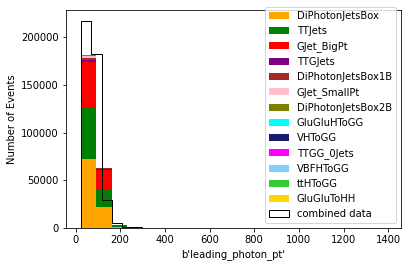

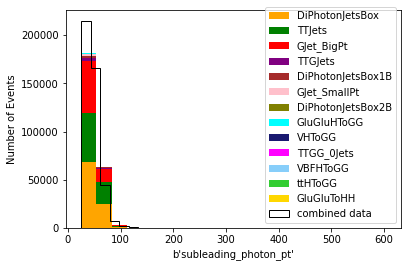

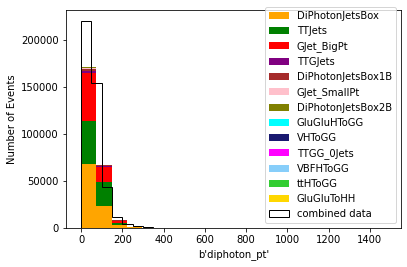

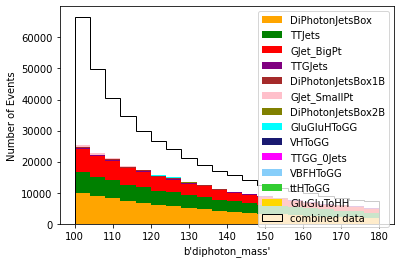

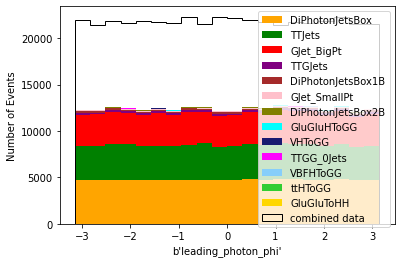

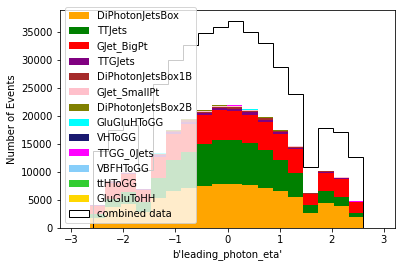

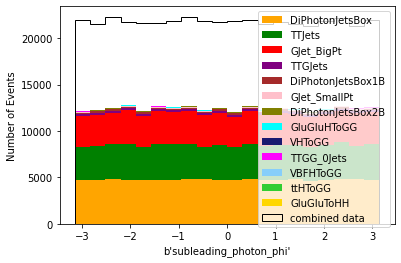

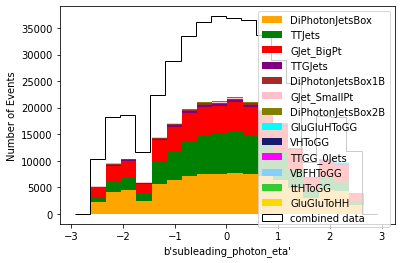

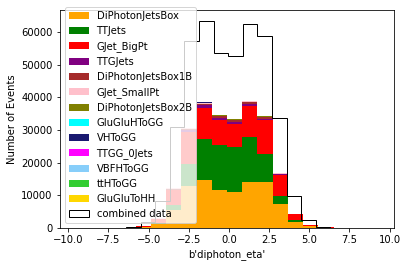

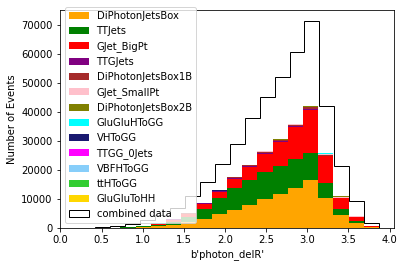

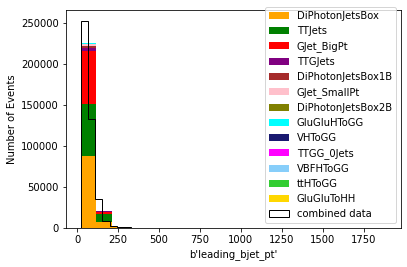

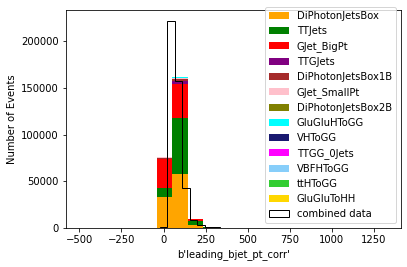

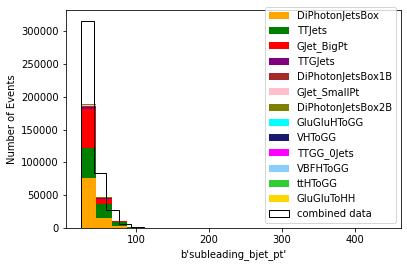

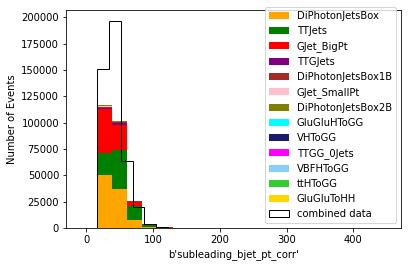

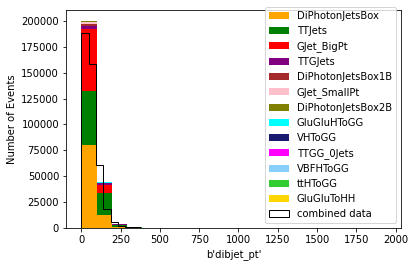

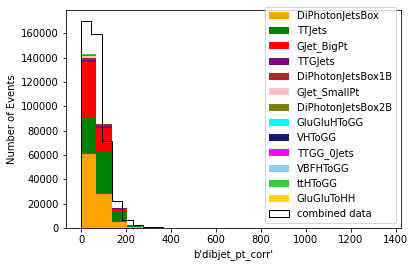

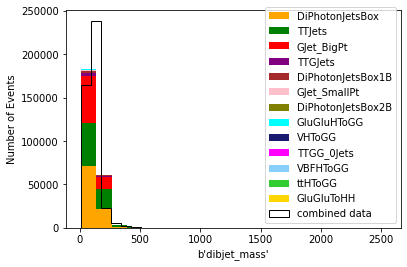

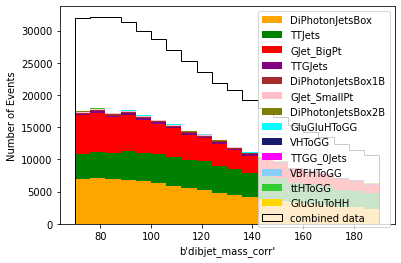

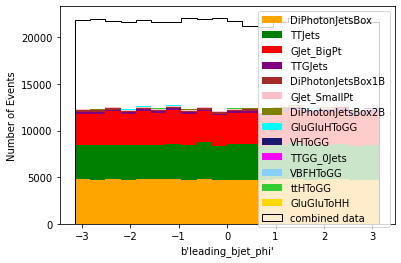

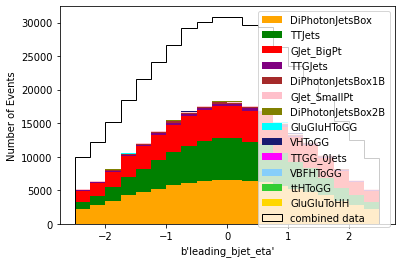

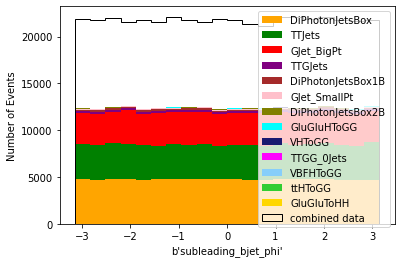

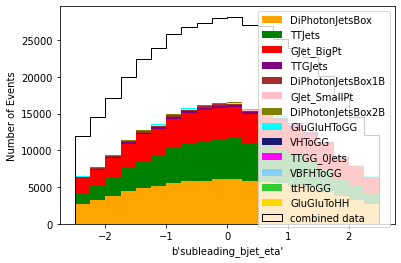

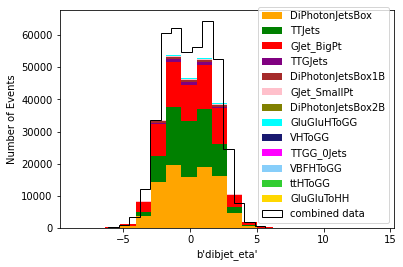

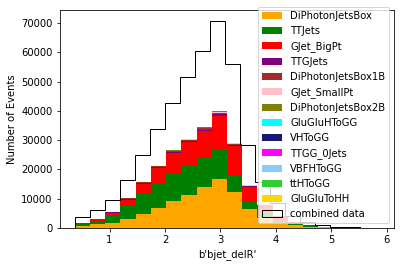

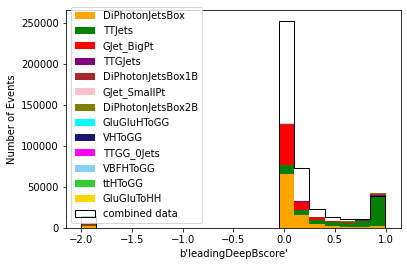

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


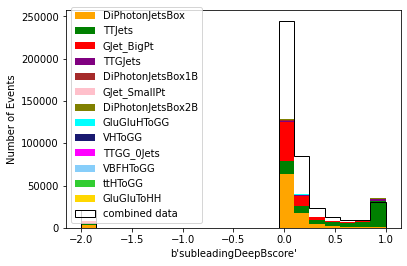

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


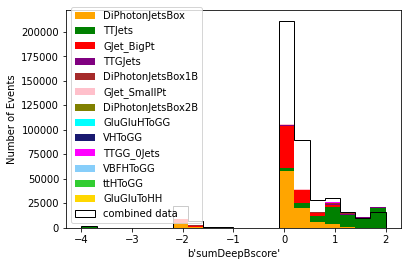

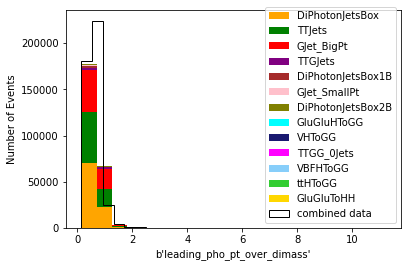

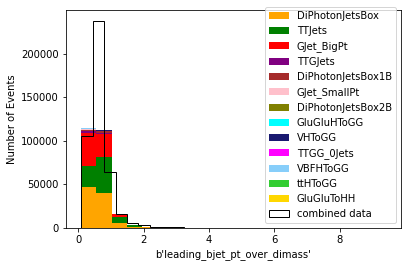

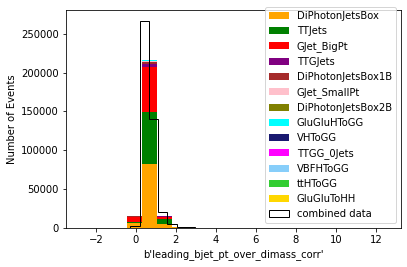

In [25]:
# Full plots

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]

dfs = [DiPhotonJetsBox_df, TTJets_df, GJet_BigPt_df, TTGJets_df, 
      DiPhotonJetsBox1B_df, GJet_SmallPt_df, DiPhotonJetsBox2B_df, GluGluHToGG_df, VHToGG_df,
      TTGG_0Jets_df, VBFHToGG_df, ttHToGG_df,  GluGluToHH_df]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

for pvar in photon_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, pvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_good_df.loc[:, pvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combined data')
    plt.xlabel(pvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
for bvar in bjet_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, bvar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_good_df.loc[:, bvar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'combined data')
    plt.xlabel(bvar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

for evar in extra_vars:
    vals = []
    genweights = []
    for df in dfs:
        val = df.loc[:, evar].values
        genweight = df.loc[:, b'genweight'].values
        vals.append(val)
        genweights.append(genweight)
    data_vals = data_good_df.loc[:, evar].values
    plt.figure()
    plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights)
    plt.hist(data_vals, bins=20 ,histtype='step', color = 'black', label=f'combined data')
    plt.xlabel(evar)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

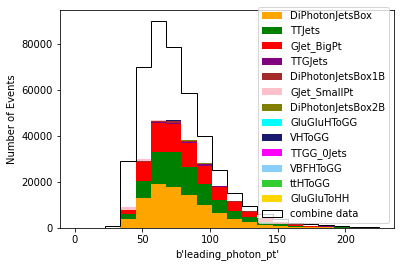

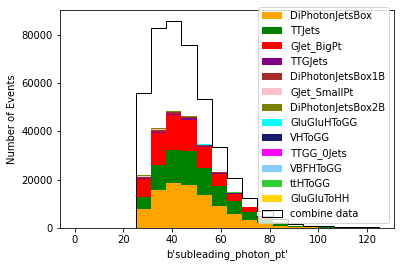

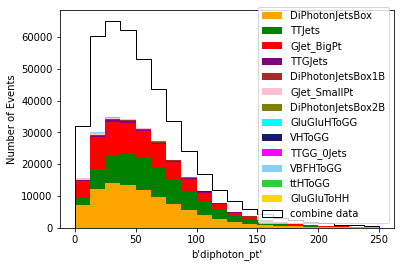

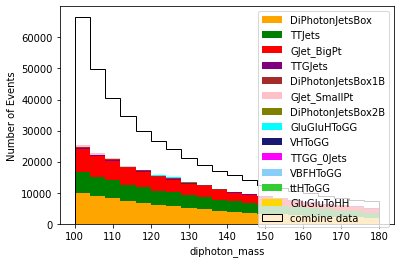

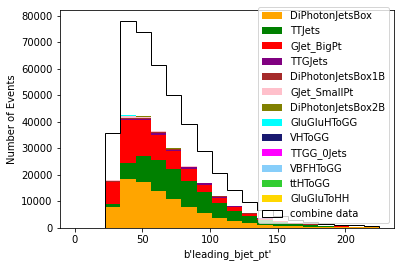

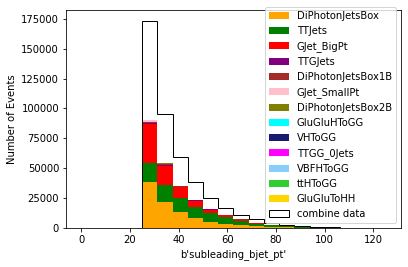

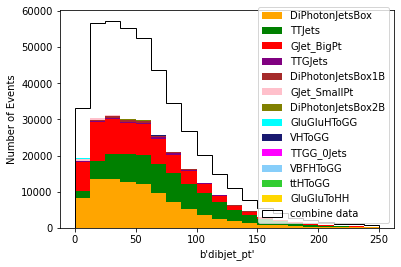

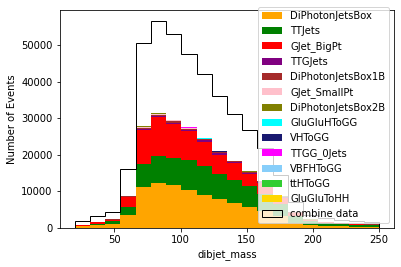

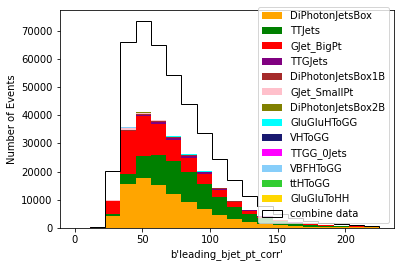

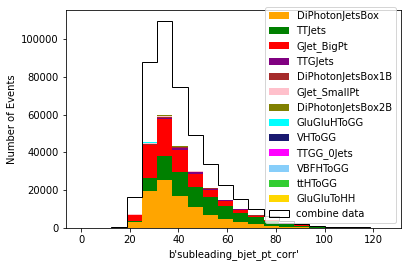

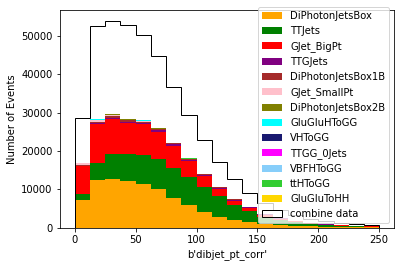

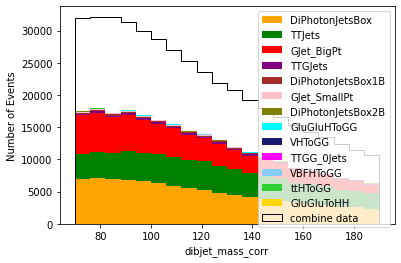

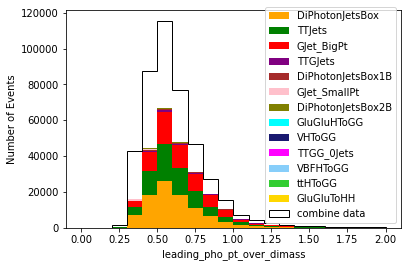

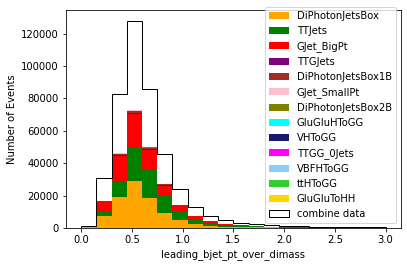

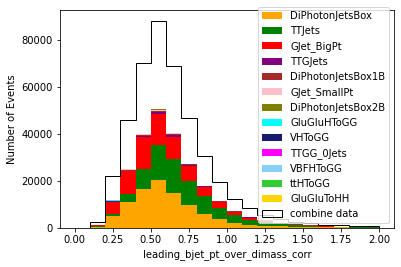

In [26]:
# Combined data - close ups

photon_vars = [b'leading_photon_pt', b'subleading_photon_pt', b'diphoton_pt', b'diphoton_mass', 
               b'leading_photon_phi', b'leading_photon_eta', b'subleading_photon_phi', b'subleading_photon_eta',
              b'diphoton_eta', b'photon_delR']
bjet_vars = [b'leading_bjet_pt',b'leading_bjet_pt_corr', b'subleading_bjet_pt', b'subleading_bjet_pt_corr', 
             b'dibjet_pt', b'dibjet_pt_corr', b'dibjet_mass', b'dibjet_mass_corr', 
               b'leading_bjet_phi', b'leading_bjet_eta', b'subleading_bjet_phi', b'subleading_bjet_eta',
              b'dibjet_eta', b'bjet_delR']
extra_vars = [b'leadingDeepBscore', b'subleadingDeepBscore', b'sumDeepBscore', 
             b'leading_pho_pt_over_dimass', b'leading_bjet_pt_over_dimass', b'leading_bjet_pt_over_dimass_corr' ]


dfs = [DiPhotonJetsBox_df, TTJets_df, GJet_BigPt_df, TTGJets_df, 
      DiPhotonJetsBox1B_df, GJet_SmallPt_df, DiPhotonJetsBox2B_df, GluGluHToGG_df, VHToGG_df,
      TTGG_0Jets_df, VBFHToGG_df, ttHToGG_df,  GluGluToHH_df]

names = ['DiPhotonJetsBox', 'TTJets', 'GJet_BigPt', 'TTGJets', 'DiPhotonJetsBox1B',
        'GJet_SmallPt','DiPhotonJetsBox2B',  'GluGluHToGG', 'VHToGG',
        'TTGG_0Jets', 'VBFHToGG', 'ttHToGG', 'GluGluToHH']

colors = ['orange', 'green', 'red', 'purple', 
          'brown', 'pink', 'olive', 'cyan', 'midnightblue', 'magenta', 
          'lightskyblue', 'limegreen', 'gold']

# Photon pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'leading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 225))
plt.xlabel(b'leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_photon_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'subleading_photon_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 125))
plt.xlabel(b'subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_subleading_photon_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'diphoton_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 250))
plt.xlabel(b'diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_diphoton_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'diphoton_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'diphoton_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (100, 180))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (100, 180))
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_diphoton_mass.png', format='png')
plt.show()

# Bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'leading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 225))
plt.xlabel(b'leading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'subleading_bjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 125))
plt.xlabel(b'subleading_bjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_subleading_bjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'dibjet_pt'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 250))
plt.xlabel(b'dibjet_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_dibjet_pt.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'dibjet_mass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (20, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (20, 250))
plt.xlabel('dibjet_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_dibjet_mass.png', format='png')
plt.show()

# Corrected bjet pt + mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'leading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 225))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 225))
plt.xlabel(b'leading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'subleading_bjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'subleading_bjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 125))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 125))
plt.xlabel(b'subleading_bjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_subleading_bjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_pt_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'dibjet_pt_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 250))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 250))
plt.xlabel(b'dibjet_pt_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_dibjet_pt_corr.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'dibjet_mass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'dibjet_mass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (70, 190))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (70, 190))
plt.xlabel('dibjet_mass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_dibjet_mass_corr.png', format='png')
plt.show()

# Leading objet pt over diobjet mass
vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_pho_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'leading_pho_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 2))
plt.xlabel('leading_pho_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_pho_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'leading_bjet_pt_over_dimass'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 3))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 3))
plt.xlabel('leading_bjet_pt_over_dimass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_bjet_pt_over_dimass.png', format='png')
plt.show()

vals = []
genweights = []
for df in dfs:
    val = df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
    genweight = df.loc[:, b'genweight'].values
    vals.append(val)
    genweights.append(genweight)
data_vals = data_good_df.loc[:, b'leading_bjet_pt_over_dimass_corr'].values
plt.figure()
plt.hist(vals, bins=20, histtype='bar', stacked = True, fill = True, label=names, color = colors, weights = genweights, range = (0, 2))
plt.hist(data_vals, bins=20, histtype='step', color = 'black', label=f'combine data', range = (0, 2))
plt.xlabel('leading_bjet_pt_over_dimass_corr')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.savefig(fname = f'Plots/Data_MC_Plots/Combine/combine_leading_bjet_pt_over_dimass_corr.png', format='png')
plt.show()